Trabajo de scraping sobre la web de FIFA para obtener información de los jugadores de la selección española de fútbol en el Mundial de 2022

https://www.fifa.com/fifaplus/es/tournaments/mens/worldcup/qatar2022/teams/spain/squad


In [ ]:
! pip install lxml bs4 requests

In [2]:
from bs4 import BeautifulSoup

html_doc = open('spain.html').read()
soup = BeautifulSoup(html_doc, 'html.parser')

<!DOCTYPE html>
<html data-react-helmet="lang,dir" dir="ltr" lang="es">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <style class="vjs-styles-defaults">
   .video-js {
        width: 300px;
        height: 150px;
      }

      .vjs-fluid {
        padding-top: 56.25%
      }
  </style>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1" name="viewport"/>
  <meta content="#020F2A" name="theme-color"/>
  <meta content="/fifaplus/mstile-150x150.png?v=6b9bed24d1df59ca113a3828909d3924" name="msapplication-TileImage"/>
  <meta content="#326295" name="msapplication-TileColor"/>
  <meta content="boCUJZPlju606sys-ZcnqZAThCMVJWEvwc6JXvElJTE" name="google-site-verification"/>
  <link href="https://www.fifa.com/fifaplus/favicon.ico?v=4c4914f90c578869e7375b03cf029202" rel="icon"/>
  <link href="https://www.fifa.com/fifaplus/apple-touch-icon.png?v=a087933e3cf148cb71a96095c8aa2dac" rel="apple-touch-icon" sizes="180x180"/>
  <link href="h
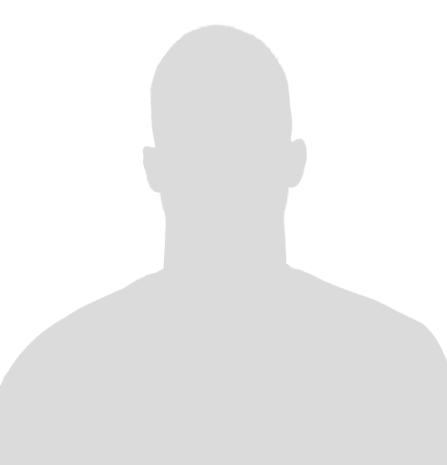
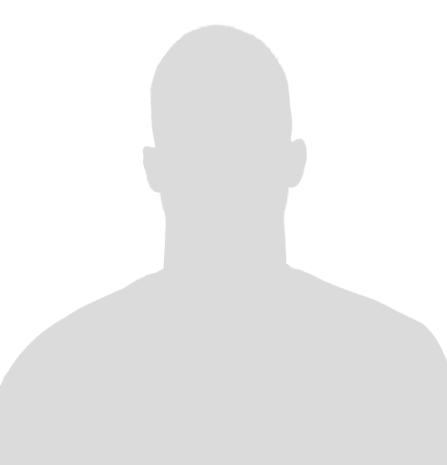

In [7]:
print(soup.prettify())

In [3]:
jugadores = soup.find_all('div', class_='player-badge-card_badgeCard__2DJ4B')
print(len(jugadores))


26


In [4]:
j = jugadores[0]
type(j)

bs4.element.Tag

In [18]:
for n in j.find('div', class_="player-badge-card_playerInfo__3Fy6Q").find_all('span', class_='d-none'):
    print(n.text)



Robert
Lynch Sánchez


AttributeError: ResultSet object has no attribute 'get_text'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [17]:
# imagen
j.find('div', class_='player-badge-card_playerImage__301X0').attrs['style']

'background-image: url("https://digitalhub.fifa.com/transform/501a7b8c-121a-450a-8da1-04768e3b239c/1442546780?io=transform:fill,width:792,height:900");'

In [20]:
import re
re.search(r'url\("(.*)"\)', j.find('div', class_='player-badge-card_playerImage__301X0').attrs['style']).group(1)

'https://digitalhub.fifa.com/transform/501a7b8c-121a-450a-8da1-04768e3b239c/1442546780?io=transform:fill,width:792,height:900'

In [22]:
j.find('div', class_='player-badge-card_playerPosition__wjnoI').find('span', class_='d-none').text


'Arquero'

In [28]:
# manager-badge-card_badgeCard__1nDB7


# soup.find_all(lambda tag:tag.name=="div" and hasattr(tag, "class") and "quote" in tag['class'])
j.find('div', class_='player-badge-card_playerPosition')
j.find_all(lambda tag:tag.name=='div' and [ x for x in tag['class'] if x.startswith('player-badge-card_playerPosition')])

[<div class="player-badge-card_playerPosition__wjnoI"><span class="d-md-none"><span style="display: -webkit-box; -webkit-line-clamp: 1; -moz-box-orient: vertical; overflow: hidden; word-break: break-all;" title="Arquero">Arquero</span></span><span class="d-none d-md-block"><span style="display: -webkit-box; -webkit-line-clamp: 1; -moz-box-orient: vertical; overflow: hidden; word-break: break-all;" title="Arquero">Arquero</span></span></div>]

In [34]:
j.select('div[class*="player-badge-card_playerPosition"]')

[<div class="player-badge-card_playerPosition__wjnoI"><span class="d-md-none"><span style="display: -webkit-box; -webkit-line-clamp: 1; -moz-box-orient: vertical; overflow: hidden; word-break: break-all;" title="Arquero">Arquero</span></span><span class="d-none d-md-block"><span style="display: -webkit-box; -webkit-line-clamp: 1; -moz-box-orient: vertical; overflow: hidden; word-break: break-all;" title="Arquero">Arquero</span></span></div>]